Add the mitral annulus points to each sample.
Trym had masks where the mitral annulus point is at the center

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
# Be able to import from src folder
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))

import misc.notebookHelpers

%matplotlib inline
%config InlineBackend.figure_format = "retina"

plt.rcParams['figure.figsize'] = (10, 10)

/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation


Load paths to all of the data

In [3]:
data_path = os.path.join(PROJ_ROOT, 'data/processed/ds_labeled')

In [4]:
h5files = [os.path.join(root, name) 
           for root, dirs, files in os.walk(data_path)
           for name in files
           if name.endswith(('.h5'))]
h5files

['/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/p1/I53BBRO2.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/p1/I53BCBO6.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/p1/I53BCN8A.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/p1/I53BDC0E.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/p1/I53BDN8I.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/p1/I53BE4GM.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/p1/I53E6MSA.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/p1/I53E71CE.h5',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/pro

In [5]:
file_names = [path.split('/')[-1][:-3] for path in h5files]
file_names

['I53BBRO2',
 'I53BCBO6',
 'I53BCN8A',
 'I53BDC0E',
 'I53BDN8I',
 'I53BE4GM',
 'I53E6MSA',
 'I53E71CE',
 'I53E7E4I',
 'I53E7KCM',
 'I53E8SCQ',
 'I53E95KU',
 'I5987882',
 'I5987E06',
 'I5987R8A',
 'I598830E',
 'I598940I',
 'I5989C0M',
 'I59C15SM',
 'I59C1ECQ',
 'I59C1S4U',
 'I59C2552',
 'I59C2N56',
 'I59C2T5A',
 'I599F482',
 'I599FOO6',
 'I599G5GA',
 'I599GGOE',
 'I599GS0I',
 'I599H20M',
 'I59D2GQM',
 'I59D2MAQ',
 'I59D2S2U',
 'I59D31J2',
 'I59D37J6',
 'I59D3DRA',
 'I5EDSLO2',
 'I5EDSU06',
 'I5EDTB0A',
 'I5EDTL0E',
 'I5EE038I',
 'I5EE0I8M',
 'I5EGD92E',
 'I5EGE0QI',
 'I5EGE5QM',
 'I5EGECQQ',
 'I5EGETAU',
 'I5EGF4J2',
 'I5FCAP82',
 'I5FCB806',
 'I5FCC48A',
 'I5FCCBGE',
 'I5FCCNGI',
 'I5FCD28M']

In [6]:
png_left_paths = [os.path.join(root, name) 
             for root, dirs, files in os.walk(data_path)
             for name in files
             if name.endswith(('lgt.png'))]
png_left_paths

['/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I53BBRO2_10_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I53BBRO2_11_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I53BBRO2_12_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I53BBRO2_13_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I53BBRO2_14_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I53BBRO2_15_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/l

In [7]:
png_right_paths = [os.path.join(root, name) 
             for root, dirs, files in os.walk(data_path)
             for name in files
             if name.endswith(('rgt.png'))]
png_right_paths

['/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I53BBRO2_10_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I53BBRO2_11_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I53BBRO2_12_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I53BBRO2_13_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I53BBRO2_14_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I53BBRO2_15_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_m

Load a single sample to check

In [8]:
#file_name = file_names[5]
file_name = 'I5EDSLO2'
file_name

'I5EDSLO2'

In [9]:
h5file = [f for f in h5files if file_name in f][0]
data = h5py.File(h5file)
video, fps = misc.notebookHelpers.video_and_fps_from_h5py(data)

In [10]:
list(data.keys())

['TVI', 'ecg', 'tissue']

In [11]:
png_left_files = [f for f in png_left_paths if file_name in f]
png_left_files

['/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I5EDSLO2_10_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I5EDSLO2_11_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I5EDSLO2_12_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I5EDSLO2_13_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I5EDSLO2_14_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/left_gt/I5EDSLO2_15_lgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/l

In [12]:
png_right_files = [f for f in png_right_paths if file_name in f]
png_right_files

['/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I5EDSLO2_10_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I5EDSLO2_11_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I5EDSLO2_12_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I5EDSLO2_13_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I5EDSLO2_14_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_masks/right_gt/I5EDSLO2_15_rgt.png',
 '/Users/torjushaukom/Documents/Studier/Masteroppgave/Strain_estimation/data/processed/ds_labeled/Mitral_point_m

In [13]:
# Check that we have a png file for each frame
data['tissue/data'].shape[2] == len(png_left_files)

True

In [14]:
# Check that we have a png file for each frame
data['tissue/data'].shape[2] == len(png_right_files)

True

Select a frame and check that the point can be extracted

In [15]:
import skimage

In [16]:
frame_num = 27

In [17]:
frame = video[frame_num, :, :]

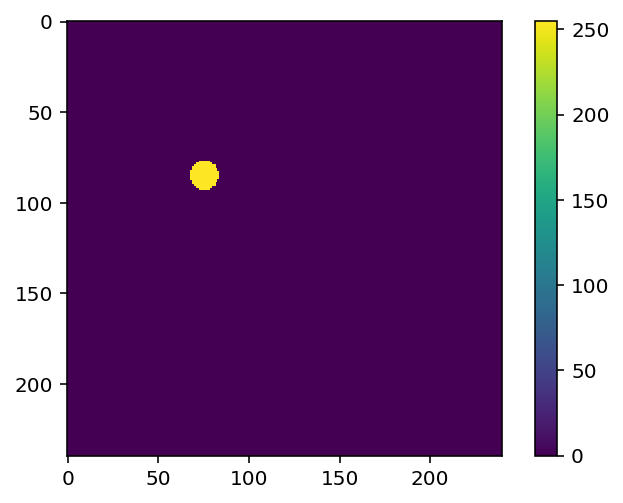

In [18]:
frame_file = [f for f in png_left_files if f.split('/')[-1].split('_')[1] == str(frame_num + 1)][0]

left_mask = skimage.io.imread(frame_file)
plt.imshow(left_mask)
plt.colorbar()

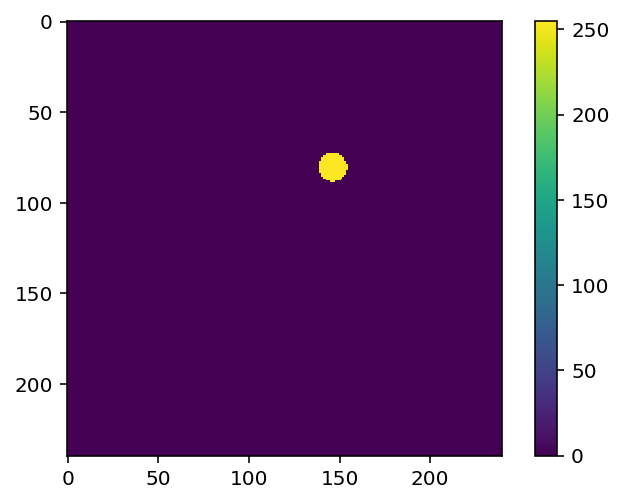

In [20]:
frame_file = [f for f in png_right_files if f.split('/')[-1].split('_')[1] == str(frame_num)][0]

right_mask = skimage.io.imread(frame_file)
plt.imshow(right_mask)
plt.colorbar()

In [ ]:
left_mask.shape

In [ ]:
right_mask.shape

In [ ]:
frame.shape

In [ ]:
data['tissue/data'].shape

Masks are cropped, so restore original indices by finding correction factors

In [ ]:
x_correction = int(round((frame.shape[1] - left_mask.shape[1]) / 2))
x_correction

In [22]:
from scipy import ndimage

In [ ]:
left_coord = ndimage.center_of_mass(left_mask)
left_coord = [int(round(c)) for c in left_coord]
left_coord[1] += x_correction

In [ ]:
right_coord = ndimage.center_of_mass(right_mask)
right_coord = [int(round(c)) for c in right_coord]
right_coord[1] += x_correction

In [ ]:
plt.imshow(frame, cmap='Greys_r')
plt.scatter(left_coord[1], left_coord[0], color='red')
plt.scatter(right_coord[1], right_coord[0], color='red')

Try it for the entire video

In [23]:
point_idc = []
for frame_num in range(video.shape[0]):
    if frame_num == 27:
        import pdb; pdb.set_trace()
    left_frame_file = [f for f in png_left_files if f.split('/')[-1].split('_')[1] == str(frame_num + 1)][0]
    left_mask = skimage.io.imread(left_frame_file)
    right_frame_file = [f for f in png_right_files if f.split('/')[-1].split('_')[1] == str(frame_num + 1)][0]
    right_mask = skimage.io.imread(right_frame_file)
    
    x_correction = int(round((video.shape[2] - left_mask.shape[1]) / 2))
    left_coord = ndimage.center_of_mass(left_mask)
    left_coord = [int(round(c)) for c in left_coord]
    left_coord[1] += x_correction
    right_coord = ndimage.center_of_mass(right_mask)
    right_coord = [int(round(c)) for c in right_coord]
    right_coord[1] += x_correction
    
    point_idc.append([left_coord, right_coord])
point_idc = np.array(point_idc)

> <ipython-input-23-5942fb739be5>(5)<module>()
-> left_frame_file = [f for f in png_left_files if f.split('/')[-1].split('_')[1] == str(frame_num + 1)][0]
(Pdb) c


In [24]:
x_correction

78

In [25]:
misc.notebookHelpers.ultraSoundAnimation(video, points=point_idc, fps=fps / 8)

In [ ]:
print([(i, points) for i, points in enumerate(point_idc)])

In [ ]:
plt.imshow(video[27, :, :], cmap='Greys_r')

plt.scatter(point_idc[27, 0, 1], point_idc[27, 0, 0], color='red')
plt.scatter(point_idc[27, 1, 1], point_idc[27, 1, 0], color='red')

In [26]:
data.close()